In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from benchmarks.runs.exploring_utils import RunAnalyser, adaptive_filter, non_adaptive_filter, model_filter

In [3]:
run_path = '../'
test_name = 'Wave_scheduled'
test_path = os.path.join(run_path, test_name)

In [4]:
runs = sorted([m for m in os.listdir(test_path) if os.path.isdir(os.path.join(test_path, m))])
analyser = RunAnalyser(runs, test_path)

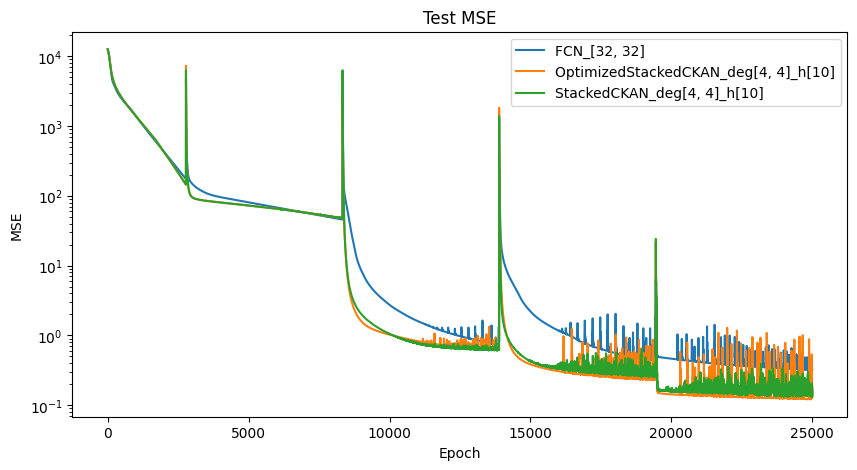

In [5]:
analyser.plot_mses(filter=lambda x: 'FCN_[32, 32]' in x or '_h[10]' in x)

<Figure size 700x700 with 0 Axes>

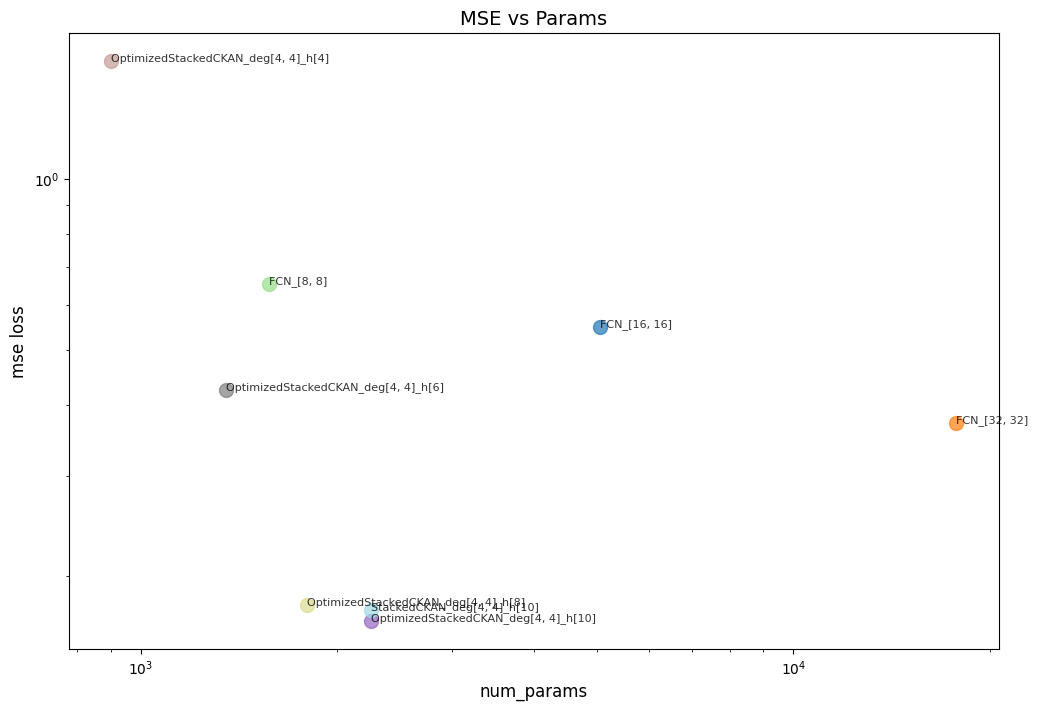

In [6]:
analyser.plot_mse_over_params()

<Figure size 700x700 with 0 Axes>

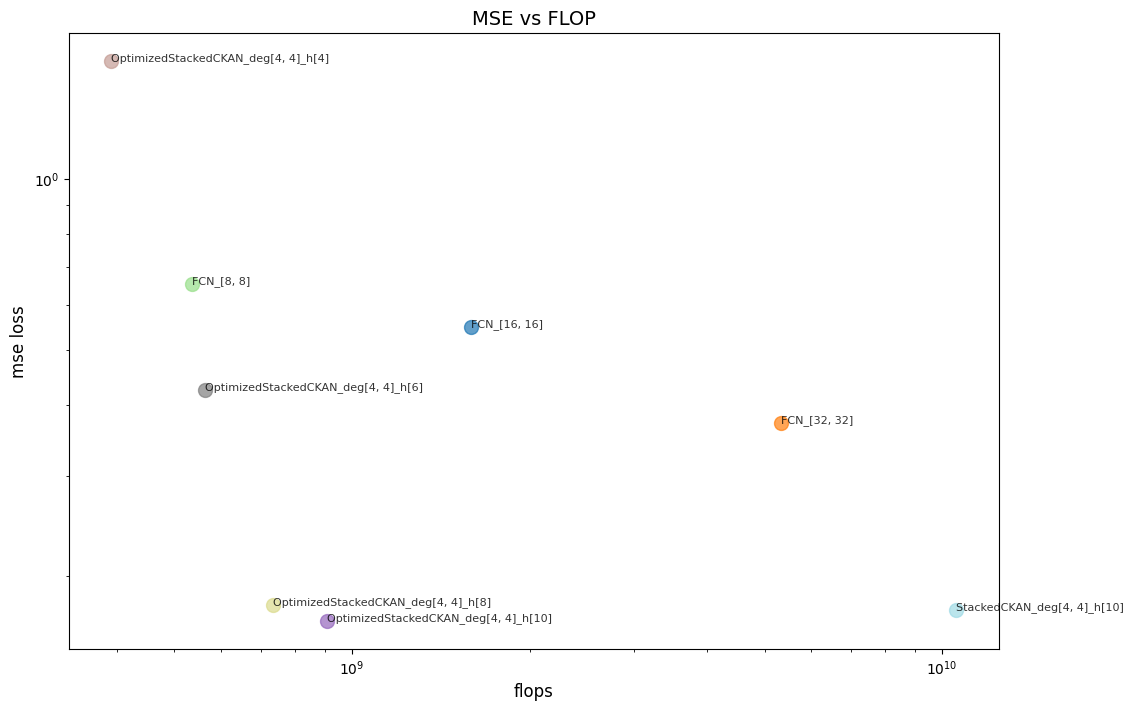

In [7]:
analyser.plot_mse_over_flops()

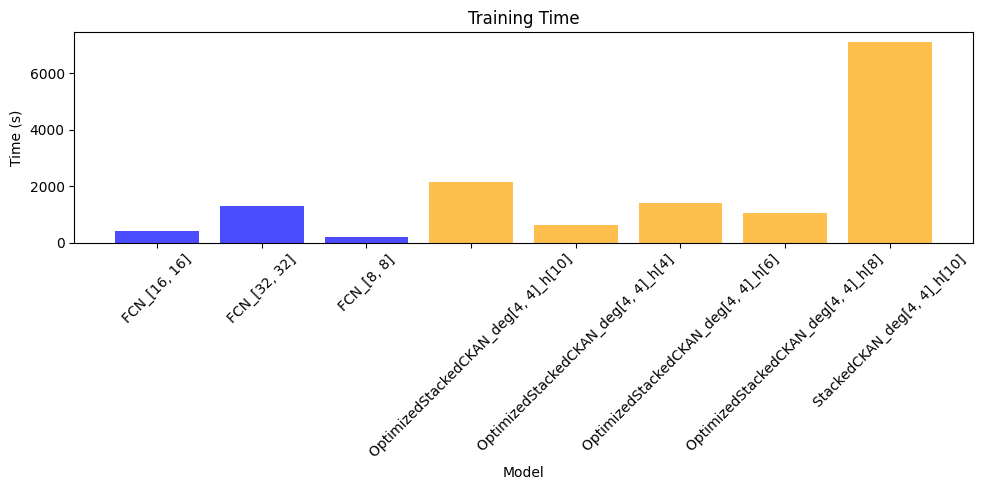

In [8]:
analyser.plot_training_times(filter=lambda x: 'Stacked' in x or 'FCN' in x)

<Figure size 700x700 with 0 Axes>

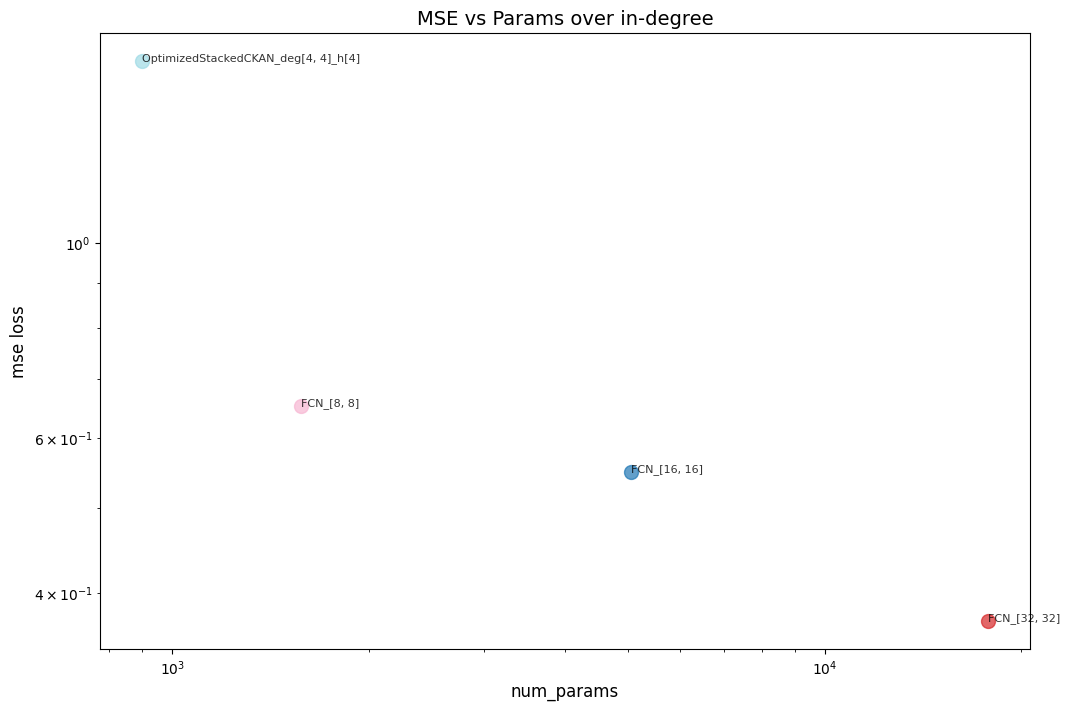

In [9]:
analyser.plot_mse_over_params(filter=lambda x: 'StackedCKAN_deg[' in x and ' 4]_h[4]' in x or 'FCN' in x, title='MSE vs Params over in-degree')

<Figure size 700x700 with 0 Axes>

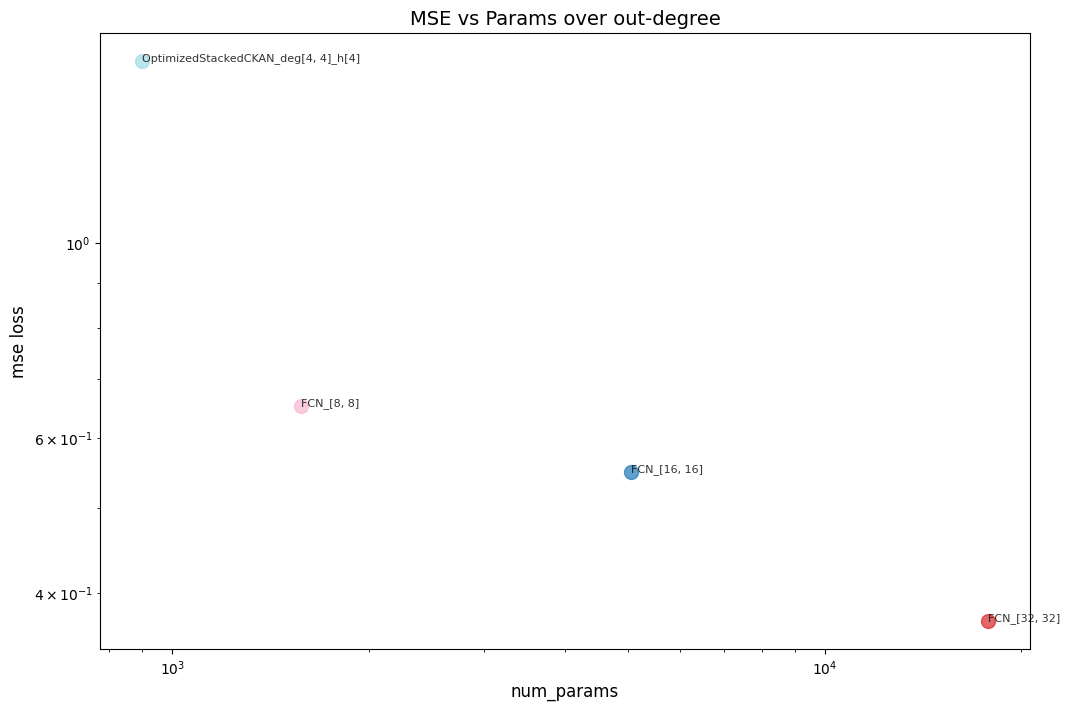

In [10]:
analyser.plot_mse_over_params(filter=lambda x: 'StackedCKAN_deg[' in x and ']_h[4]' in x or 'FCN' in x, title='MSE vs Params over out-degree')

<Figure size 700x700 with 0 Axes>

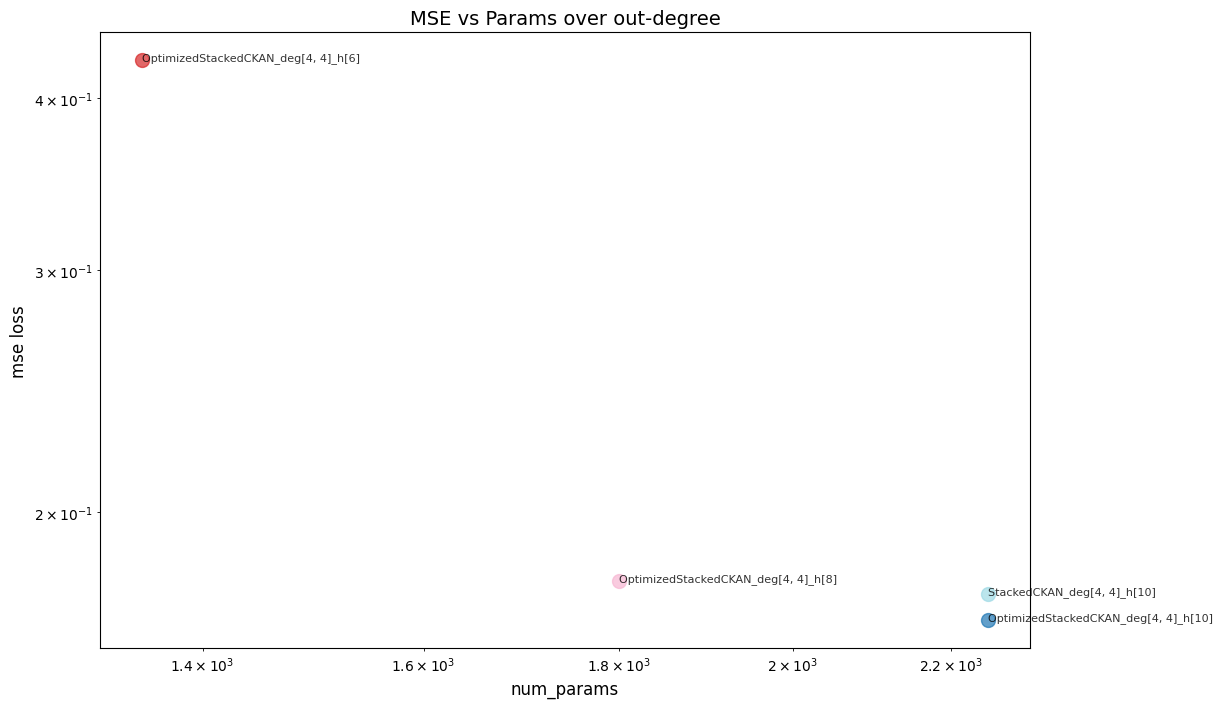

In [11]:
analyser.plot_mse_over_params(filter=lambda x: 'StackedCKAN_deg[4, ' in x and ']_h[4]' not in x, title='MSE vs Params over out-degree')

/tmp/ipykernel_1109439/1869240350.py:8: RuntimeWarning: invalid value encountered in divide
  rae = lambda exact, pred: (np.abs(exact - pred) / (np.abs(exact)))


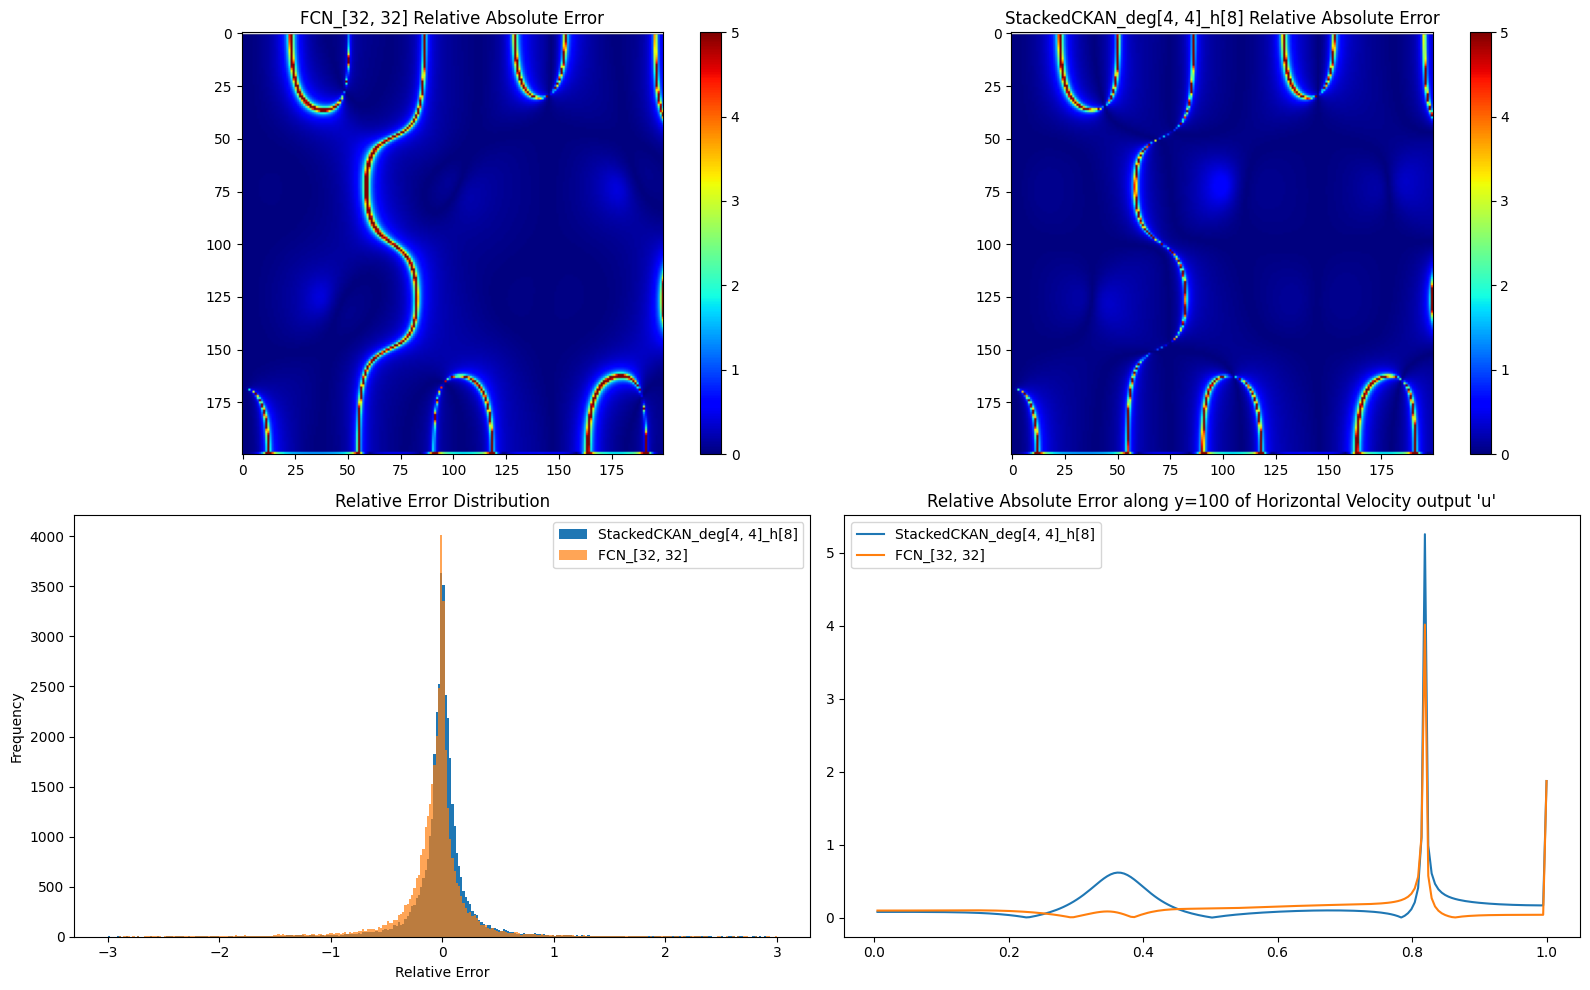

In [ ]:

with open(f'/vol/bitbucket/ss7921/FBPINNs/benchmarks/runs/{test_name}/OptimizedStackedCKAN_deg[4, 4]_h[10]/test_25000.npy', 'rb') as f:
    pred0_ckan = np.load(f).reshape(200, 200, -1)
with open(f'/vol/bitbucket/ss7921/FBPINNs/benchmarks/runs/{test_name}/FCN_[32, 32]/test_25000.npy', 'rb') as f:
    pred0_fcn = np.load(f).reshape(200, 200, -1)
with open(f'/vol/bitbucket/ss7921/FBPINNs/benchmarks/runs/{test_name}/OptimizedStackedCKAN_deg[4, 4]_h[10]/test_exact.npy', 'rb') as f:
    exact0 = np.load(f).reshape(200, 200, -1)

rae = lambda exact, pred: (np.abs(exact - pred) / (np.abs(exact)))
rE = lambda exact, pred: ((exact - pred) / (np.abs(exact)))

plt.figure(figsize=(16, 10))

slice=0
vmin, vmax = 0, 5
plt.subplot(2, 2, 1)
plt.imshow(rae(exact0[:, :, slice], pred0_fcn[:, :, slice]), cmap='jet', vmin=vmin, vmax=vmax)
plt.title('FCN_[32, 32] Relative Absolute Error')
plt.colorbar()

plt.subplot(2, 2, 2)
plt.imshow(rae(exact0[:, :, slice], pred0_ckan[:, :, slice]), cmap='jet', vmin=vmin, vmax=vmax)
plt.title('StackedCKAN_deg[4, 4]_h[8] Relative Absolute Error')
plt.colorbar()

plt.subplot(2, 2, 3)
range=(-3, 3)
re_ckan = rE(exact0[1:199, 1:199, slice], pred0_ckan[1:199, 1:199, slice])
re_fcn = rE(exact0[1:199, 1:199, slice], pred0_fcn[1:199, 1:199, slice])
plt.hist(re_ckan.flatten(), bins=300, label='StackedCKAN_deg[4, 4]_h[8]', range=range)
plt.hist(re_fcn.flatten(), bins=300, label='FCN_[32, 32]', alpha=0.7, range=range)
plt.legend()
plt.xlabel('Relative Error')
plt.ylabel('Frequency')
plt.title('Relative Error Distribution')

xs = np.linspace(0, 1, 200)
plt.subplot(2, 2, 4)
plt.plot(xs, rae(exact0[:, 100, slice], pred0_ckan[:, 100, slice]), label='StackedCKAN_deg[4, 4]_h[8]')
plt.plot(xs, rae(exact0[:, 100, slice], pred0_fcn[:, 100, slice]), label='FCN_[32, 32]')
plt.legend()
plt.title('Relative Absolute Error along y=0.5')

plt.tight_layout()
plt.show()